Source: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [224]:
df = pd.read_csv('Mental Health Dataset.csv')

In [218]:
df_copy = df

In [238]:
df = df.loc[df['Country'].isin(["Sweden","United States","United Kingdom"])]

In [226]:
df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292358,5/6/2015 16:55,Male,United States,Business,No,No,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [227]:
df.describe(include='O')

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,225530,225530,225530,225530,221498,225530,225530,225530,225530,225530,225530,225530,225530,225530,225530,225530,225530
unique,460,2,3,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 12:31,Male,United States,Housewife,No,No,Yes,1-14 days,Yes,Yes,No,Medium,No,No,Maybe,No,No
freq,1950,182130,171308,51163,204986,133668,119256,48929,77076,84449,80147,77912,118837,81614,79713,182580,87510


In [214]:
pd.to_datetime(df.Timestamp)

0        2014-08-27 11:29:00
1        2014-08-27 11:31:00
2        2014-08-27 11:32:00
3        2014-08-27 11:37:00
4        2014-08-27 11:43:00
                 ...        
292359   2015-07-27 23:25:00
292360   2015-08-17 09:38:00
292361   2015-08-25 19:59:00
292362   2015-09-26 01:07:00
292363   2016-02-01 23:04:00
Name: Timestamp, Length: 292364, dtype: datetime64[ns]

In [213]:
df.Timestamp.max()

'9/9/2014 13:49'

<Axes: xlabel='Gender'>

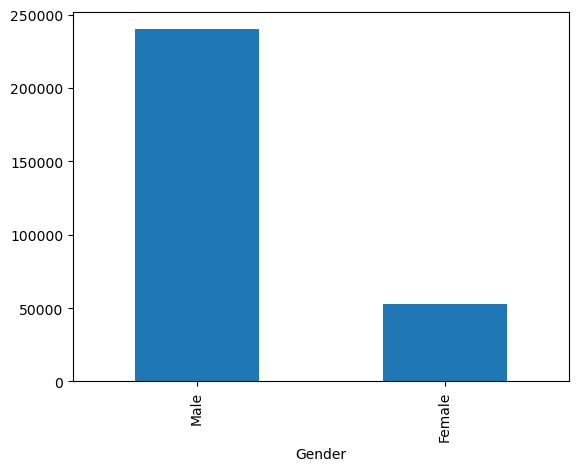

In [17]:
df.Gender.value_counts().plot(kind="bar")
# Very heavily male dominated data set

In [142]:
df.Occupation = df.Occupation.str.replace('Unemployed','Housewife')

<Axes: xlabel='Country'>

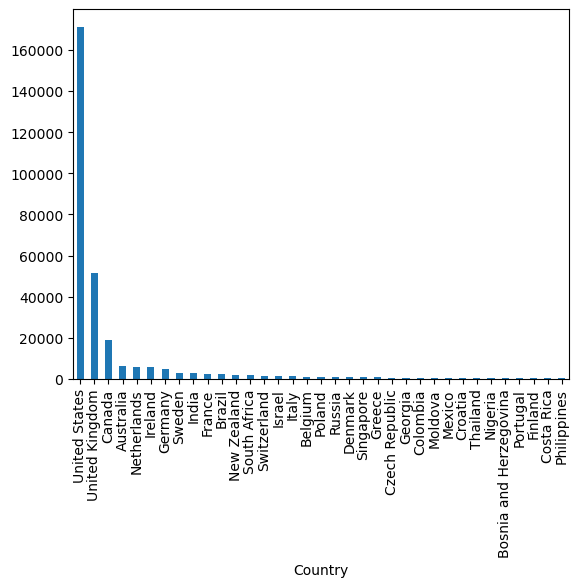

In [19]:
df.Country.value_counts().plot(kind="bar")
#Mostly in the US

<Axes: xlabel='Occupation'>

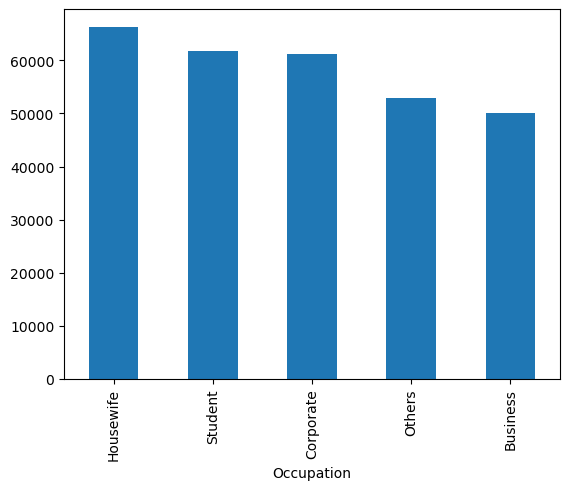

In [21]:
df.Occupation.value_counts().plot(kind='bar')

#Fairly even distribution between occupations

<Axes: xlabel='self_employed'>

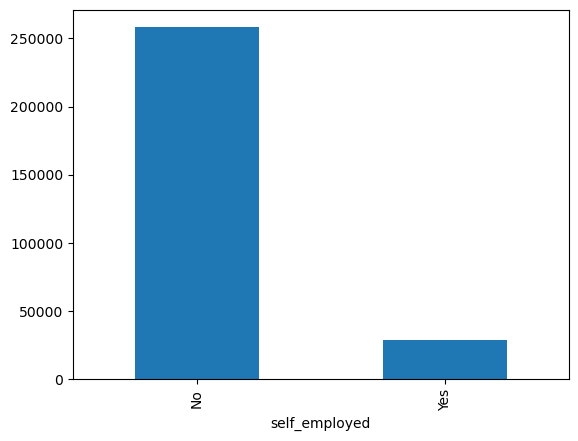

In [24]:
df.self_employed.value_counts().plot(kind='bar')

#Mostly not self employed

In [28]:
df.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

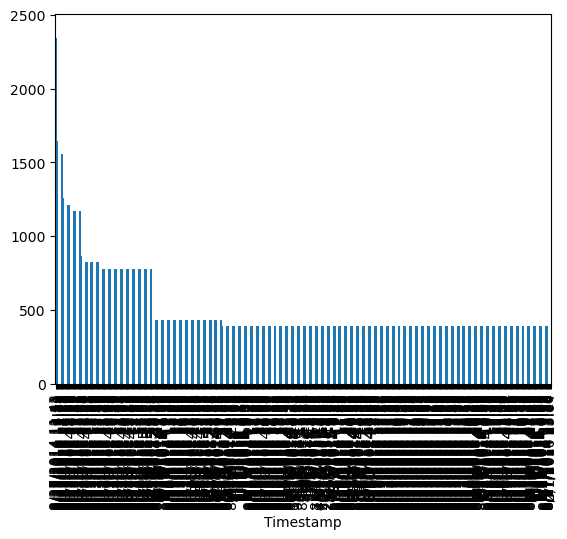

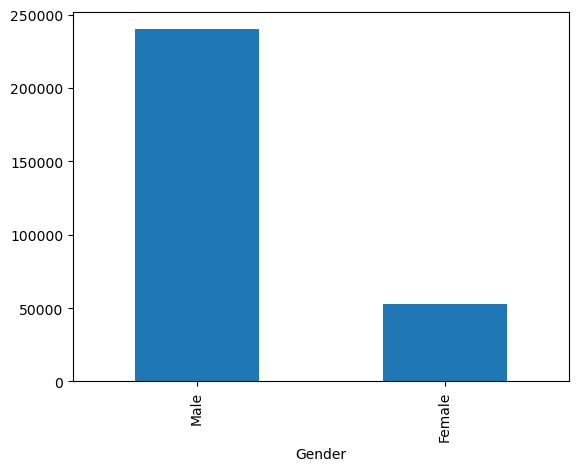

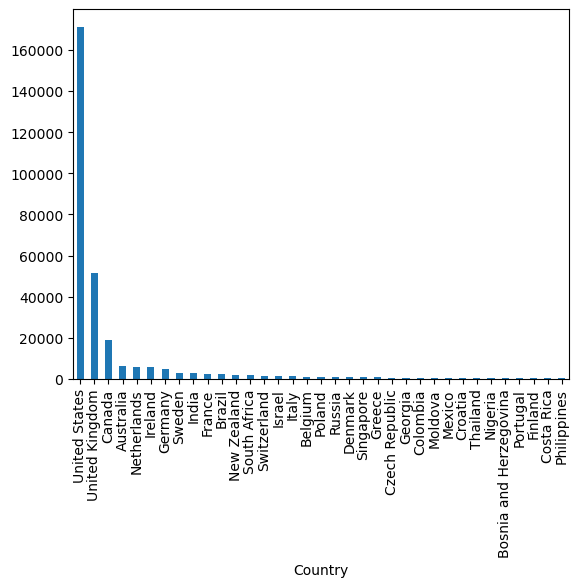

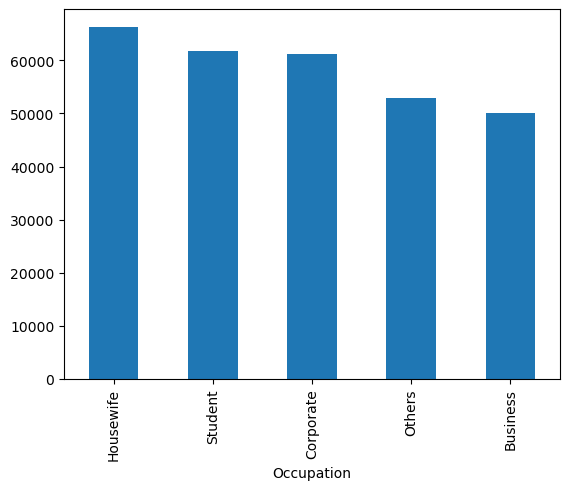

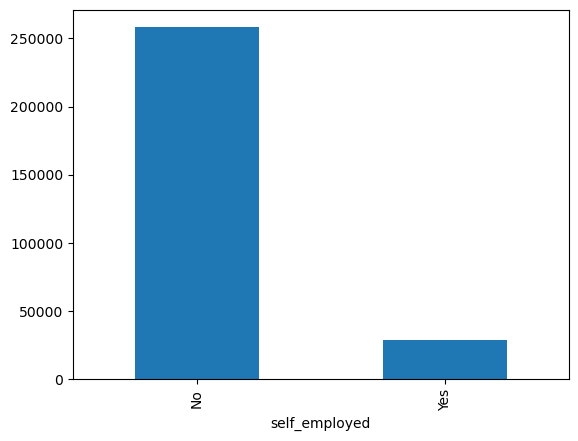

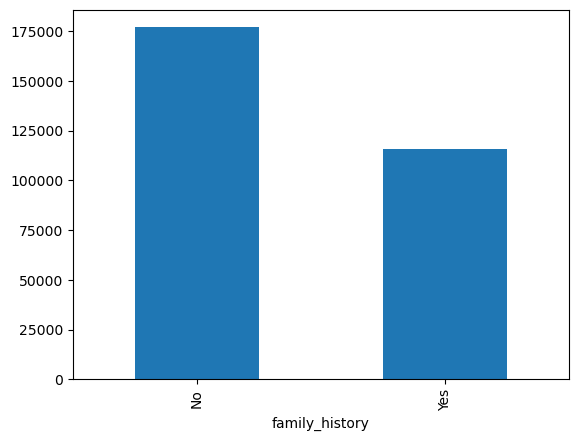

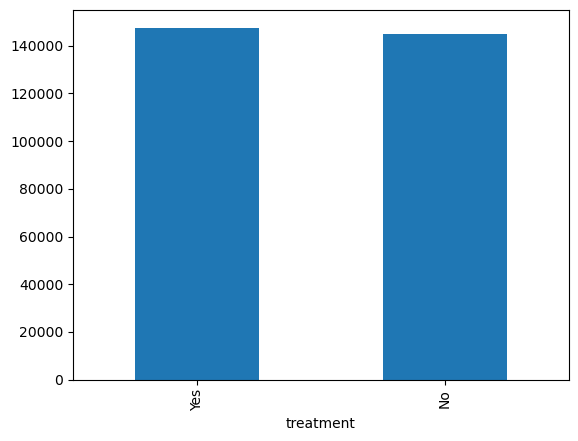

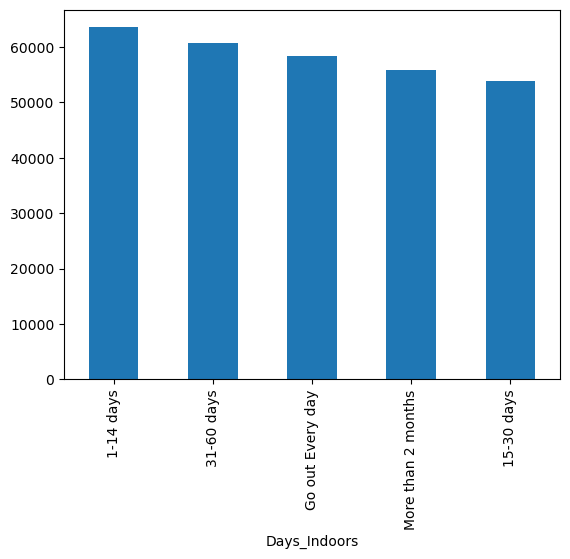

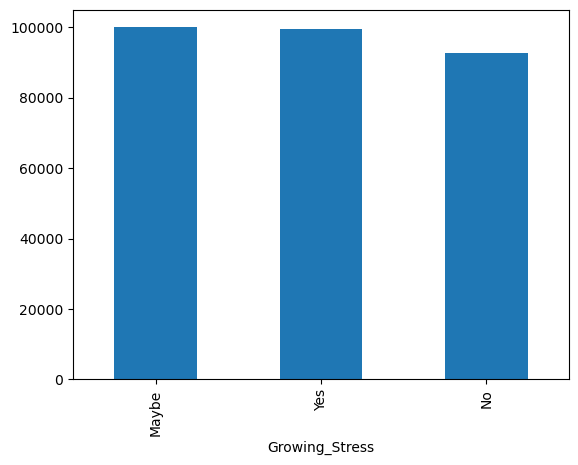

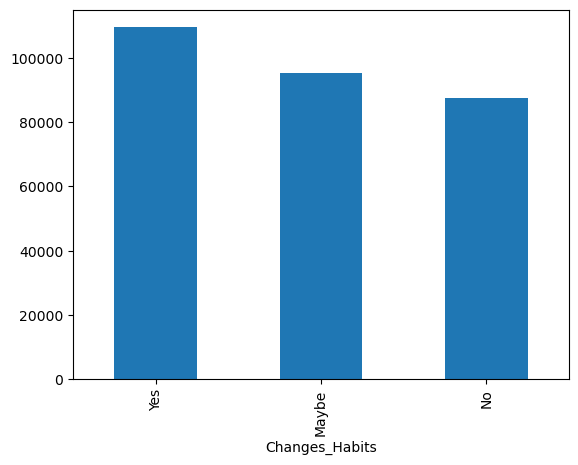

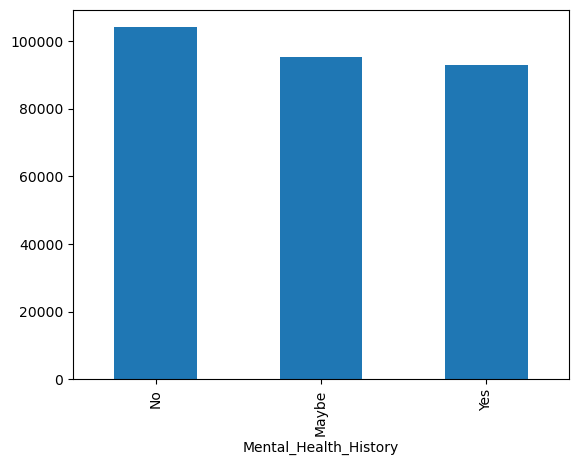

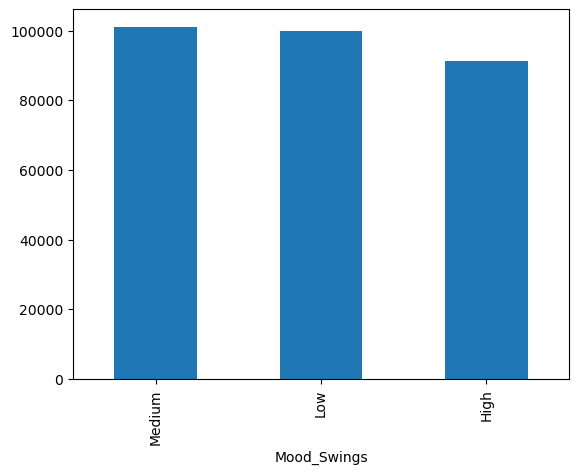

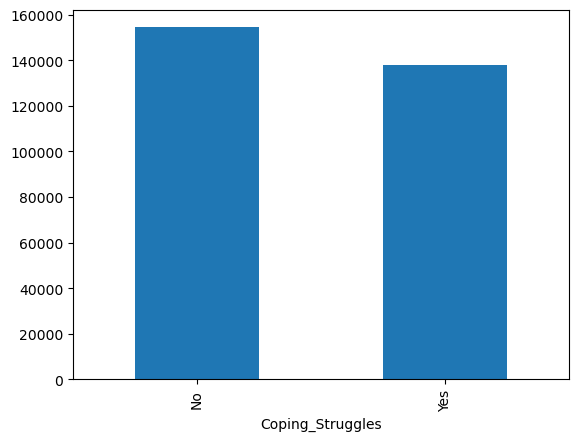

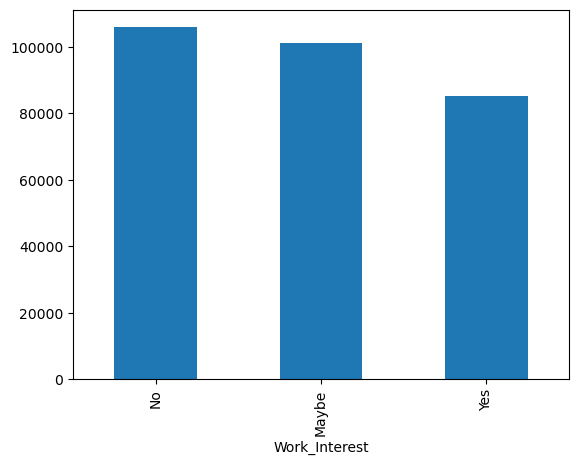

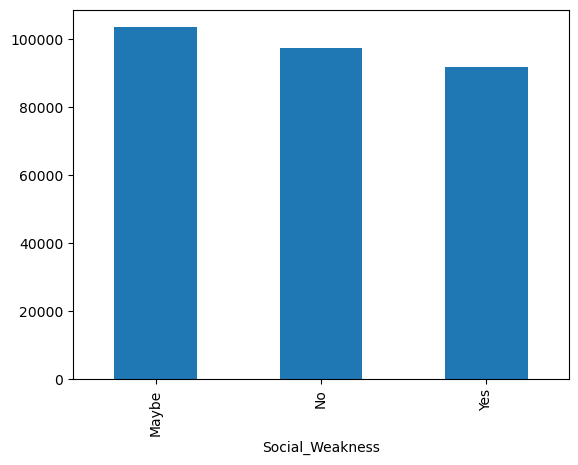

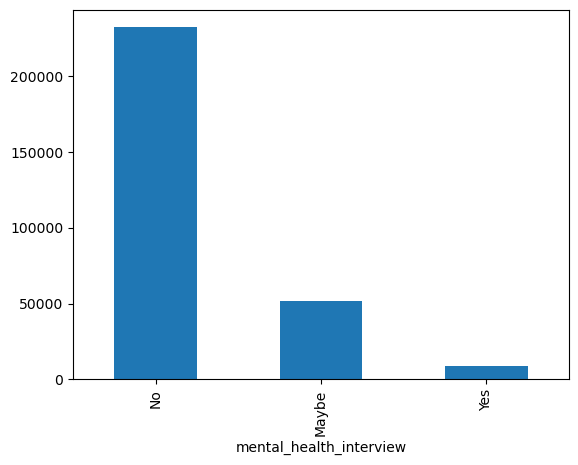

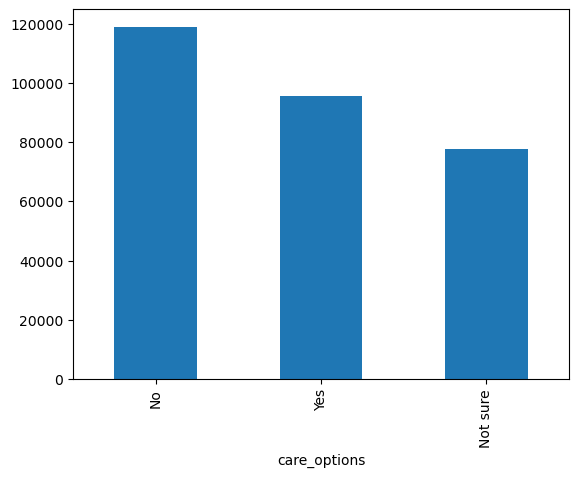

In [27]:
for col in df.columns:
    df[col].value_counts().plot(kind='bar')
    plt.show()

# df.self_employed.value_counts().plot(kind='bar')

Some of the columns are a bit unclear what they are actually asking. I am working with the assumption that everyone who was asked in this dataset has been diagnosed with a mental illness of some sort. 

'Timestamp', Most of the data seems to have been collected around 2014, making most of the data 10 years old, but it could be interesting nonetheless

'Gender', Majority males in the study, not really a problem but worth to account for

'Country', Around 60% of the dataset is from United States

'Occupation', Kind of even distribution between 5 different categories

'self_employed', Most people in the dataset are not self employed

'family_history', Slightly more people have no recorded history of mental illness in their family

'treatment', Around half of people have sought treatment

'Days_Indoors', How long do you spend at home at a time on average?

'Growing_Stress', Also lacking a clear documentation of the original question, but assuming it is something like: Do you feel a growing stress?

'Changes_Habits', Have you noticed a change in habits? Also assumed question on my part since the original question is lacking.

'Mental_Health_History', Fairly straightforward, do you have a history of mental illness?

'Mood_Swings', Have you noticed mood swings?

'Coping_Struggles', Are you struggling to cope with your situation?

'Work_Interest', Do you have any interest in working?

'Social_Weakness', Have you noticed any struggles in social situations?

'mental_health_interview', Would you mention your current mental health in a job interview?

'care_options' Do you have access to health care options?



Interesting things to plot?

Main focus is going to be how different aspects affects peoples willingness to seek treatment.

## Occupation per gender, normalized
Larger part of females are students while men seem to be slightly more likely to be corporate workers or unemployed

<Axes: xlabel='Gender'>

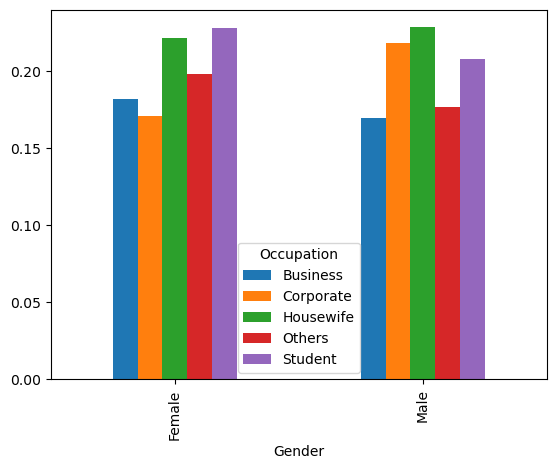

In [143]:
df.groupby(['Gender'])['Occupation'].value_counts(normalize=True).unstack().plot(kind='bar') # Apparently there are a lot of male housewives, fun. Probably just means stay at home

## Growing Stress per Days spent indoors on average
I don't really feel like I read any clear patterns here, might come back to it later.

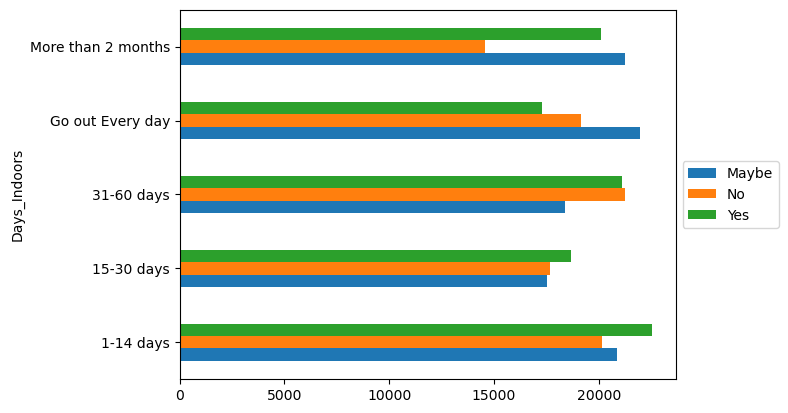

In [144]:
df.groupby(['Days_Indoors'])['Growing_Stress'].value_counts().sort_values().unstack().plot(kind="barh")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## Self employment per Occupation
Starting to question this dataset, because it has weirdly even distribution between selfemployed people in every category. How are you a selfemployed Housewife?

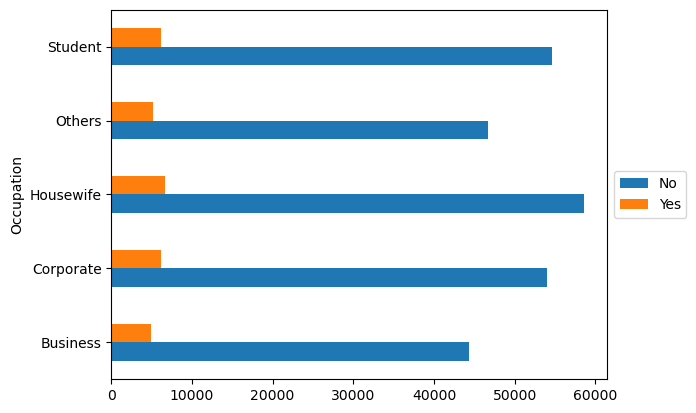

In [145]:
df.groupby(['Occupation'])['self_employed'].value_counts().unstack().plot(kind='barh')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



## Treatment depending on if you have care options or not

This is interesting and also seems to align with what you'd think. If you have care options you are a lot more likely to also seek out treatment. Makes sense.

<Axes: xlabel='care_options'>

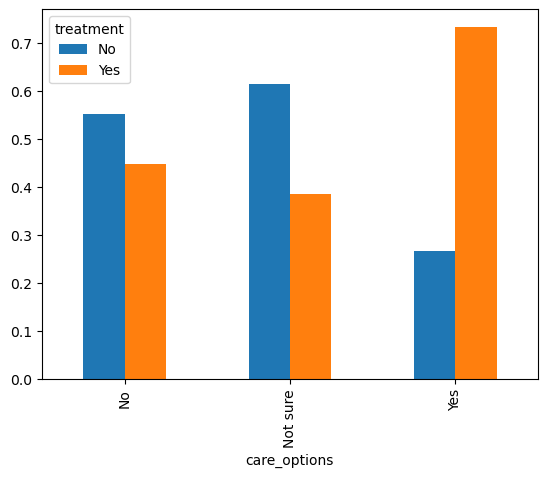

In [240]:
df.groupby(['care_options'])['treatment'].value_counts(normalize=True).unstack().plot(kind='bar')



<Axes: xlabel='care_options'>

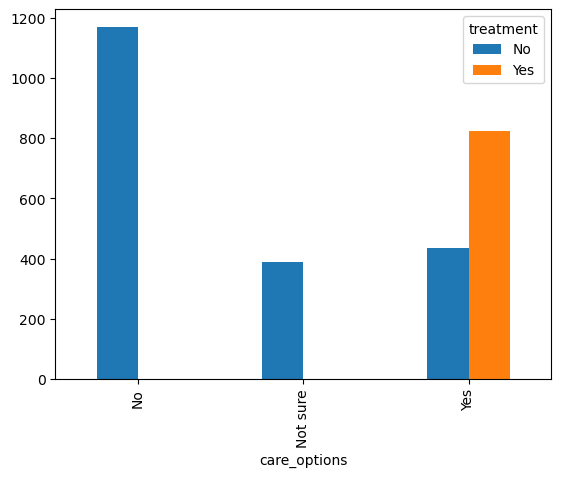

In [257]:
df.loc[df["Country"]=="Sweden"].groupby(['care_options'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

<Axes: xlabel='care_options'>

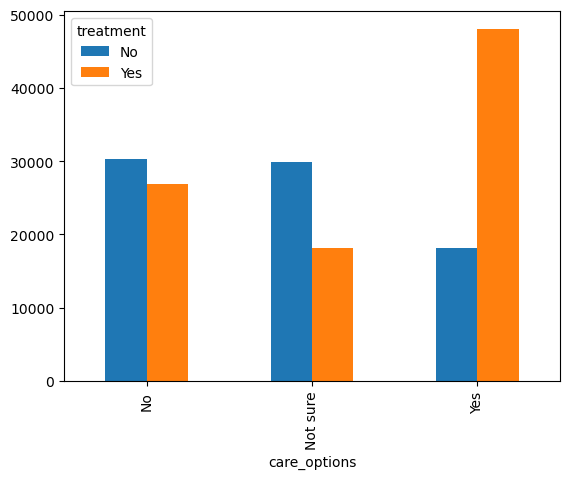

In [258]:
df.loc[df["Country"]=="United States"].groupby(['care_options'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

<Axes: xlabel='care_options'>

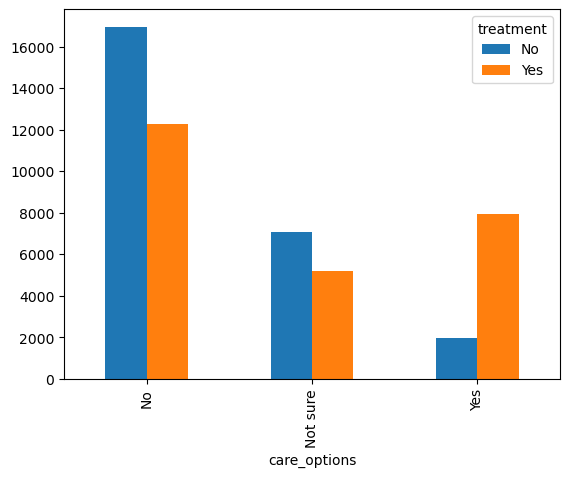

In [259]:
df.loc[df["Country"]=="United Kingdom"].groupby(['care_options'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

## Treatment per Gender

Women are more likely to get treatment

<Axes: xlabel='Gender'>

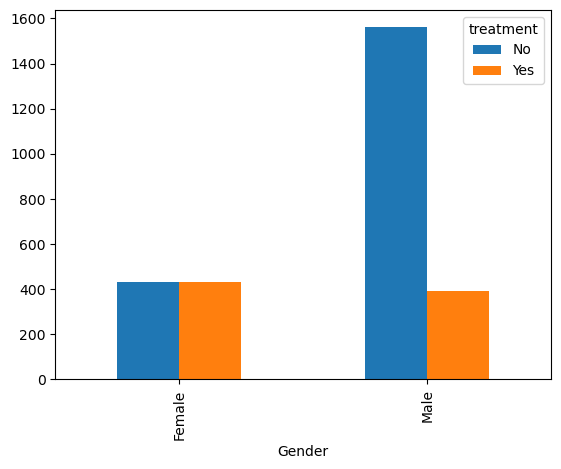

In [260]:
df.loc[df["Country"]=="Sweden"].groupby(['Gender'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

<Axes: xlabel='Gender'>

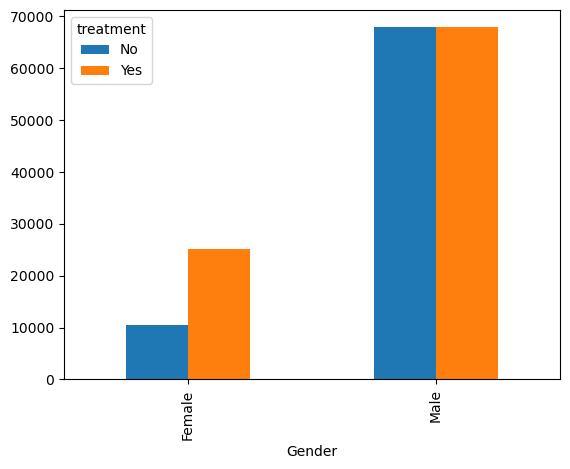

In [261]:
df.loc[df["Country"]=="United States"].groupby(['Gender'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

<Axes: xlabel='Gender'>

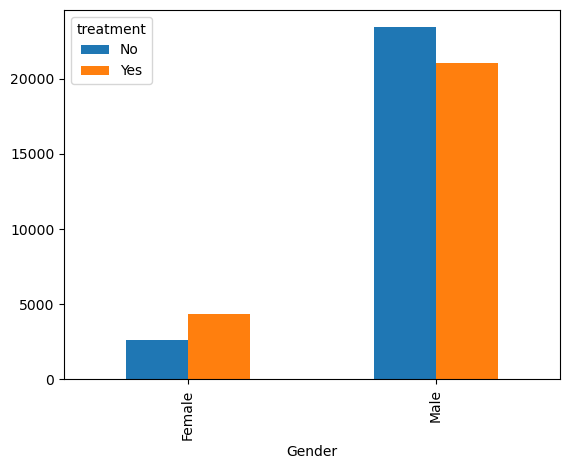

In [262]:
df.loc[df["Country"]=="United Kingdom"].groupby(['Gender'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

## Care Options per Gender

Men are more likely to not have care options, while women either have the option or they are not sure. I find it interesting that men are following the stereotype of rather being sure and wrong than giving away that they don't know

<Axes: xlabel='Gender'>

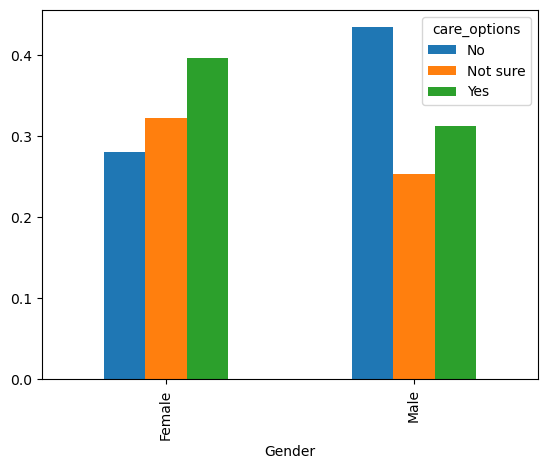

In [148]:
df.groupby(['Gender'])['care_options'].value_counts(normalize=True).unstack().plot(kind='bar')

## Family History per Gender

Pretty significant difference here, women are more likely have reported a family history of mental health issues, meanwhile over 60% of men report no such thing.

<Axes: xlabel='Gender'>

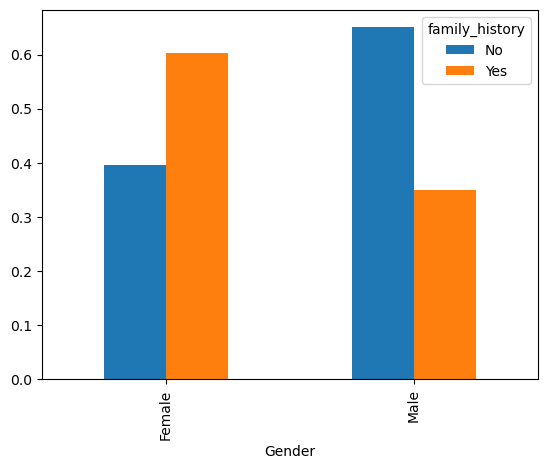

In [149]:
df.groupby(['Gender'])['family_history'].value_counts(normalize=True).unstack().plot(kind='bar')

## Treatment per Family History
As expected far more likely to get treatment if you have a family history of mental health issues

<Axes: xlabel='family_history'>

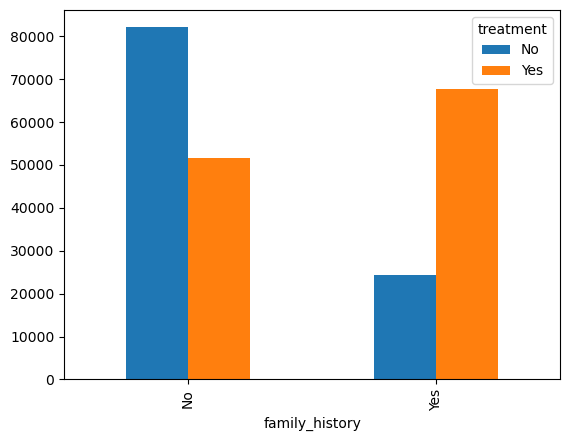

In [263]:
df.groupby(['family_history'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

<Axes: xlabel='family_history'>

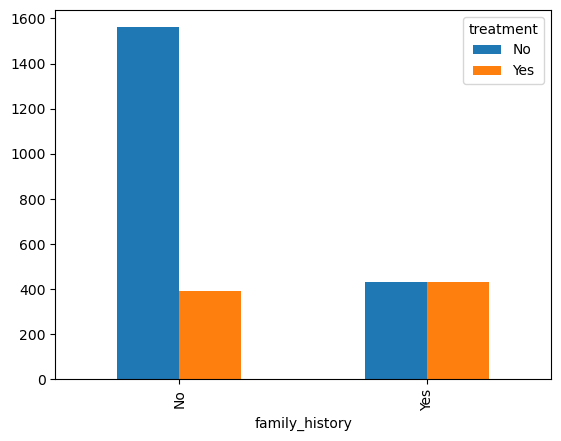

In [267]:
df.loc[df["Country"]=="Sweden"].groupby(['family_history'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

<Axes: xlabel='family_history'>

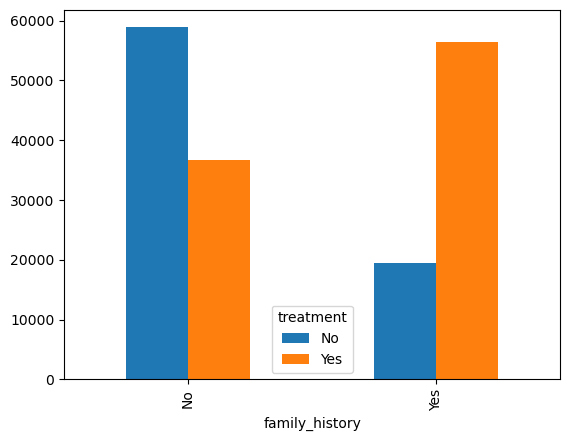

In [268]:
df.loc[df["Country"]=="United States"].groupby(['family_history'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

<Axes: xlabel='family_history'>

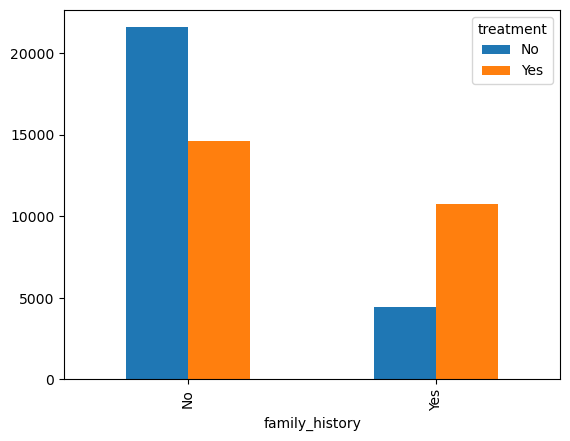

In [269]:
df.loc[df["Country"]=="United Kingdom"].groupby(['family_history'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

## Treatment vs Job Interview
Doesn't matter if you've gotten treatment or not, still very unlikely to tell an interviewer about your current mental health

<Axes: xlabel='treatment'>

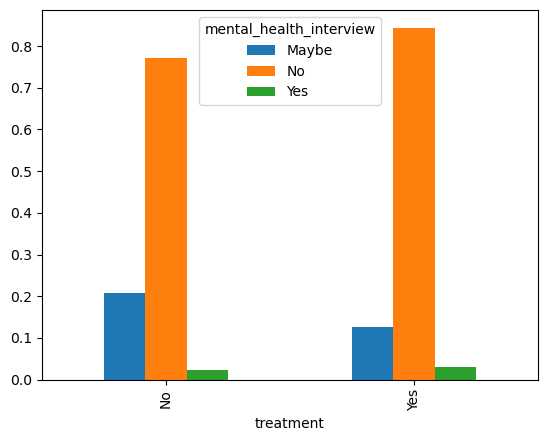

In [229]:
df.groupby(['treatment'])['mental_health_interview'].value_counts(normalize=True).unstack().plot(kind='bar')

## Mental Health in a job interview split on Gender

Surprisingly, while No is still the overwhelming consensus, men seem to be a lot more willing to consider talking about it. I'm gonna guess that this has something to do with women having a lot more social pressure to be "perfect" in a work environment. Interesting point.

<Axes: xlabel='Gender'>

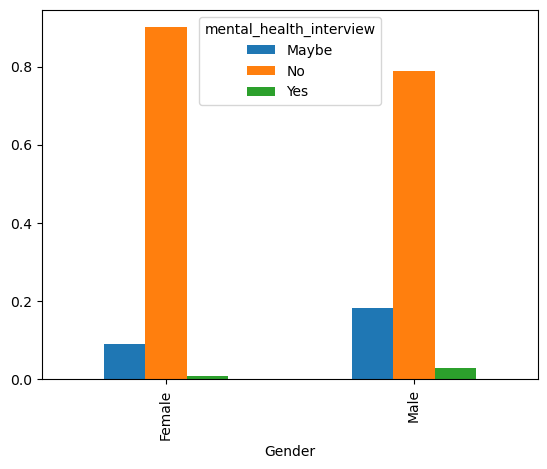

In [230]:
df.groupby(['Gender'])['mental_health_interview'].value_counts(normalize=True).unstack().plot(kind='bar')

## Coping Struggles vs Mood Swings

<Axes: xlabel='Mood_Swings'>

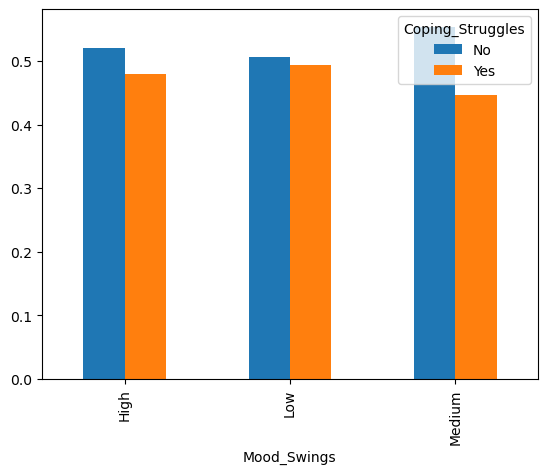

In [231]:
df.groupby(['Mood_Swings'])['Coping_Struggles'].value_counts(normalize=True).unstack().plot(kind='bar')

In [154]:
top_countries = df['Country'].value_counts().head(5).index.tolist()
top5_df = df[df['Country'].isin(top_countries)]


<Axes: ylabel='Country'>

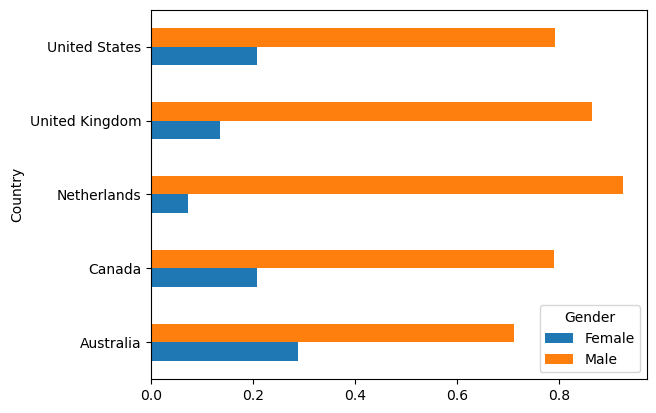

In [156]:
top5_df.groupby(["Country"])["Gender"].value_counts(normalize=True).unstack().plot(kind='barh')

<Axes: xlabel='Gender'>

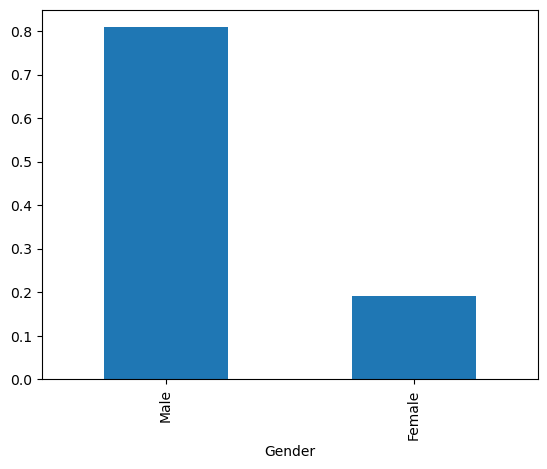

In [159]:
top5_df.Gender.value_counts(normalize=True).plot(kind='bar')

## Country distribution
Around 85% of the people asked lives in the top 5 countries

In [161]:
df.Country.value_counts(normalize=True)*100

Country
United States             58.594081
United Kingdom            17.582192
Canada                     6.405029
Australia                  2.061129
Netherlands                2.015980
Ireland                    1.897634
Germany                    1.600744
Sweden                     0.963867
India                      0.948817
France                     0.800372
Brazil                     0.800372
New Zealand                0.682027
South Africa               0.682027
Switzerland                0.533581
Israel                     0.533581
Italy                      0.533581
Belgium                    0.281840
Poland                     0.281840
Russia                     0.266791
Denmark                    0.266791
Singapore                  0.266791
Greece                     0.266791
Czech Republic             0.133395
Georgia                    0.133395
Colombia                   0.133395
Moldova                    0.133395
Mexico                     0.133395
Croatia             

In [162]:
df.Country.value_counts(normalize=0)

Country
United States             171308
United Kingdom             51404
Canada                     18726
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      824
Poland                       824
Russia                       780
Denmark                      780
Singapore                    780
Greece                       780
Czech Republic               390
Georgia                      390
Colombia                     390
Moldova                      390
Mexico                       390
Croatia                      390
Thailand                     390
Nigeria                      390
Bo

In [163]:
df.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

## Treatment depending on Occupation

<Axes: xlabel='Occupation'>

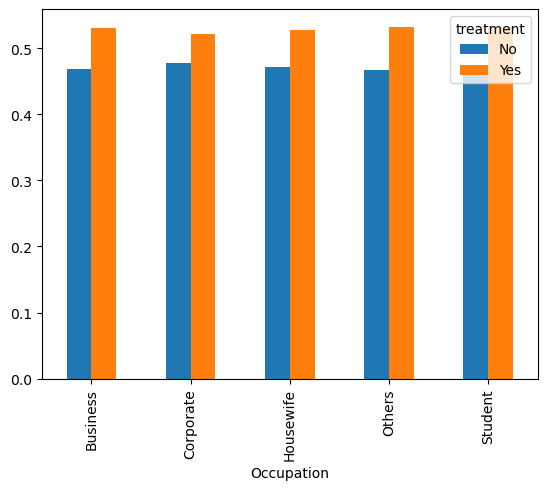

In [232]:
df.groupby(['Occupation'])['treatment'].value_counts(normalize=True).unstack().plot(kind='bar')

## Treatment per days spent indoors on average

<Axes: xlabel='Days_Indoors'>

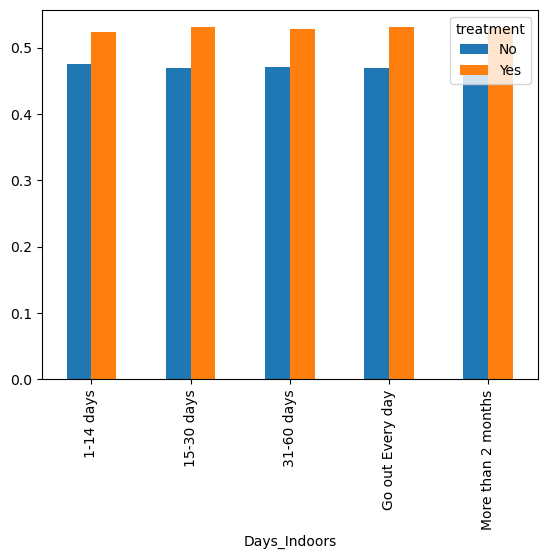

In [270]:
df.groupby(['Days_Indoors'])['treatment'].value_counts(normalize=1).unstack().plot(kind='bar')

<Axes: xlabel='Days_Indoors'>

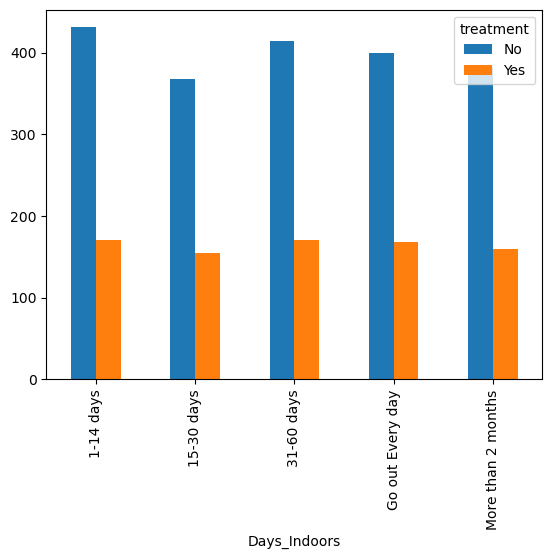

In [274]:
df.loc[df['Country']=='Sweden'].groupby(['Days_Indoors'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

<Axes: xlabel='Days_Indoors'>

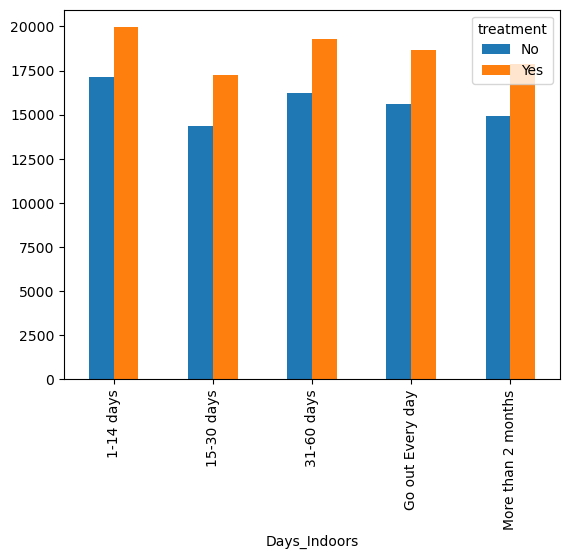

In [276]:
df.loc[df['Country']=='United States'].groupby(['Days_Indoors'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

<Axes: xlabel='Days_Indoors'>

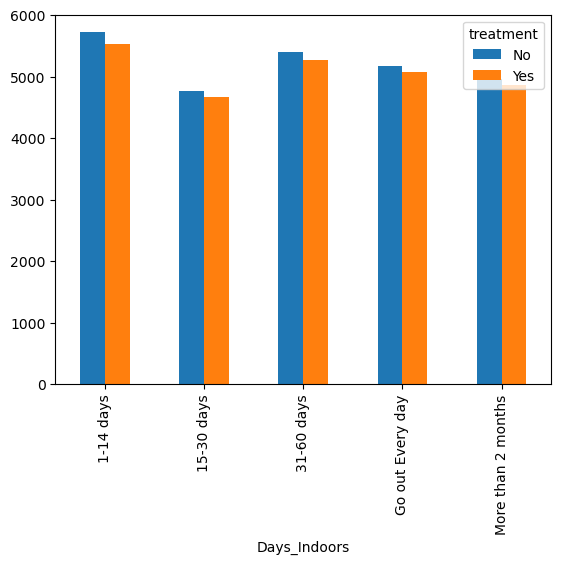

In [277]:
df.loc[df['Country']=='United Kingdom'].groupby(['Days_Indoors'])['treatment'].value_counts(normalize=0).unstack().plot(kind='bar')

## Treatment depending on country

In [180]:
country_treatment

Country                 treatment
Australia               Yes          0.604381
                        No           0.395619
Belgium                 No           1.000000
Bosnia and Herzegovina  No           1.000000
Brazil                  No           0.666667
                        Yes          0.333333
Canada                  Yes          0.539464
                        No           0.460536
Colombia                No           1.000000
Costa Rica              No           1.000000
Croatia                 Yes          1.000000
Czech Republic          No           1.000000
Denmark                 Yes          1.000000
Finland                 No           1.000000
France                  No           1.000000
Georgia                 No           1.000000
Germany                 No           0.500000
                        Yes          0.500000
Greece                  No           1.000000
India                   No           0.702956
                        Yes          0.297044


In [281]:
df_copy.Country.value_counts(normalize=1)*100

Country
United States             58.594081
United Kingdom            17.582192
Canada                     6.405029
Australia                  2.061129
Netherlands                2.015980
Ireland                    1.897634
Germany                    1.600744
Sweden                     0.963867
India                      0.948817
France                     0.800372
Brazil                     0.800372
New Zealand                0.682027
South Africa               0.682027
Switzerland                0.533581
Israel                     0.533581
Italy                      0.533581
Belgium                    0.281840
Poland                     0.281840
Russia                     0.266791
Denmark                    0.266791
Singapore                  0.266791
Greece                     0.266791
Czech Republic             0.133395
Georgia                    0.133395
Colombia                   0.133395
Moldova                    0.133395
Mexico                     0.133395
Croatia             

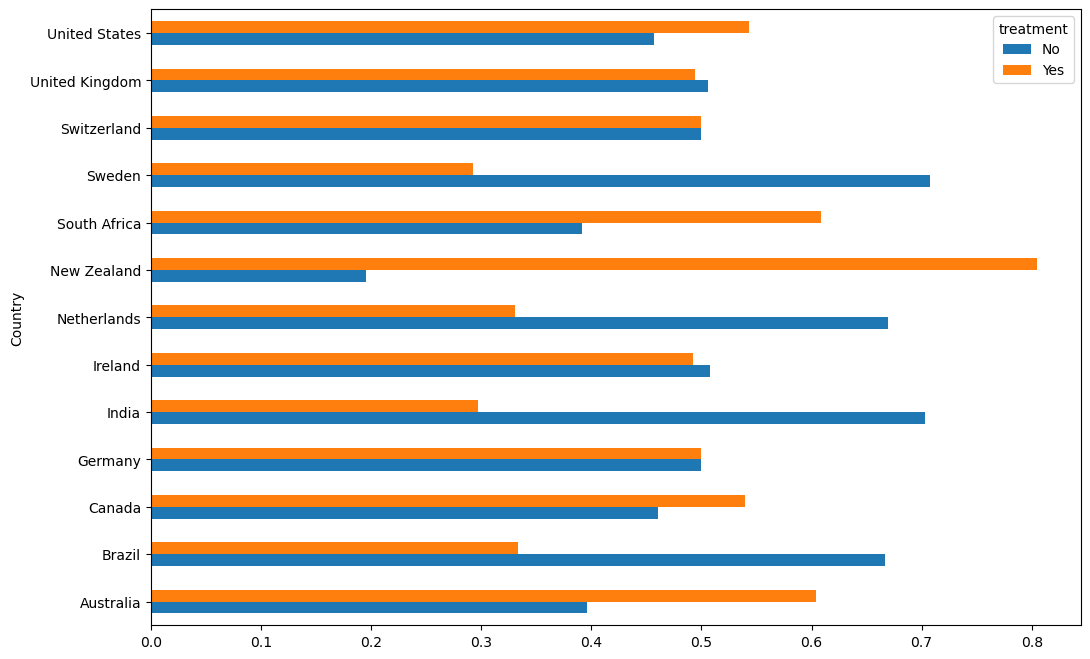

In [234]:
# Group by 'Country' and 'treatment', calculate value counts, and unstack the result
country_treatment_counts = df_copy.groupby(['Country'])['treatment'].value_counts(normalize=1).unstack().dropna()

# Plot the grouped data
ax = country_treatment_counts.plot(kind='barh', figsize=(12, 8))

# Show the plot
plt.show()


#Focus in on 

In [211]:
country_treatment_counts.loc[['Sweden','United States','Netherlands','United Kingdom','Canada']]

treatment,No,Yes
Country,,
Sweden,1994.0,824.0
United States,78276.0,93032.0
Netherlands,3944.0,1950.0
United Kingdom,26004.0,25400.0
Canada,8624.0,10102.0


<Axes: xlabel='Country'>

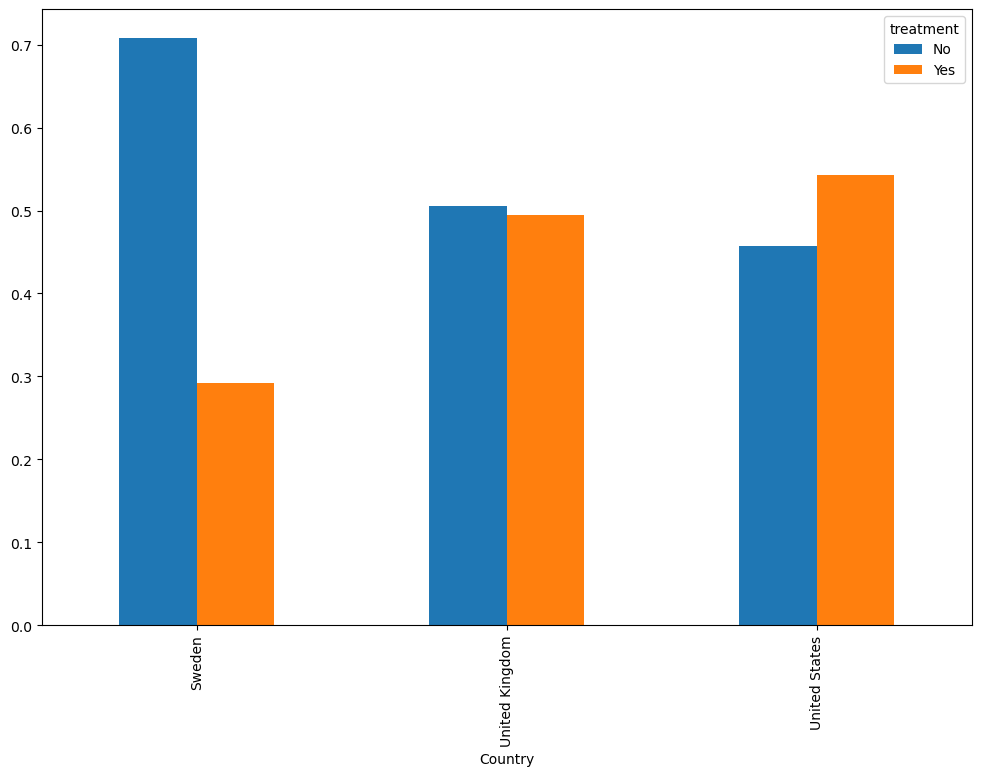

In [239]:
df.groupby(['Country'])['treatment'].value_counts(normalize=1).unstack().plot(kind='bar', figsize=(12,8))